In [1]:
cd ../..

D:\Users\mrefoyo\Proyectos\RL-CFE


C:\Users\mrefoyo\miniconda3\envs\RL-CFE_39\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import pickle
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import plotly.io as pio

In [3]:
DATASETS = [
    'CBF', 'CinCECGTorso', 'Coffee',
    "ECG200",
    "ECG5000", 'FacesUCR', 'FordA',
    'GunPoint', 'HandOutlines',
    'ItalyPowerDemand', 'NonInvasiveFatalECGThorax2', 'Plane',
    'ProximalPhalanxOutlineCorrect',
    'Strawberry', 'TwoPatterns'
]
model_to_explain = "inceptiontime_pytorch"

In [4]:
def read_concat_results_df(datasets, model_to_explain, experiment_folder):
    df_aux = pd.DataFrame()
    for dataset in datasets:
        folder_path = f"./experiments/results/{dataset}/{model_to_explain}/{experiment_folder}"
        results_path = f"{folder_path}/concatenated_results.xlsx"
        
        df_dataset = pd.read_excel(results_path, index_col="Unnamed: 0")
        df_dataset.columns = [col.replace("algorithm_cemnn_", "") for col in df_dataset.columns]
        df_dataset["dataset"] = dataset
        df_aux = pd.concat([df_aux, df_dataset])
    return df_aux

# Hierarchies

In [9]:
experiment_folder = "hcem_sensitivity_hierarchies_univariate_plau"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux = df_aux[["experiment_name", "dataset", "ts_ch_block_pcts", "improvement_over_nun_mean", "steps_mean"]]

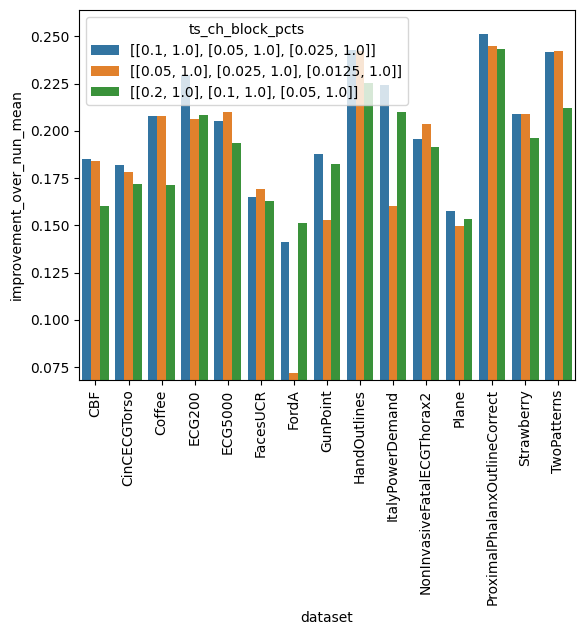

In [10]:
ax = sns.barplot(df_aux, x="dataset", y="improvement_over_nun_mean", hue="ts_ch_block_pcts")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

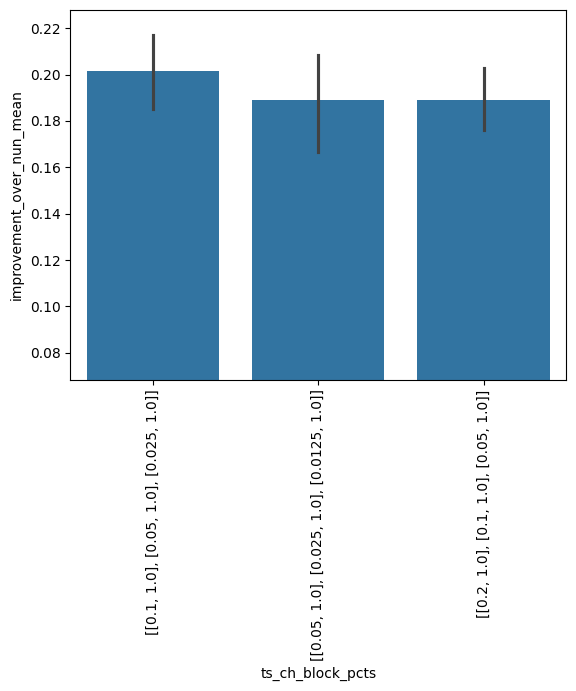

In [11]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

# Skip planning steps

In [200]:
experiment_folder = "hcem_sensitivity_skip"
df_aux = read_concat_results_df(DATASETS, model_to_explain, experiment_folder)
df_aux = df_aux[["experiment_name", "dataset", "ts_ch_block_pcts", "plan_every", "improvement_over_nun_mean"]]

In [201]:
df_aux_h = df_aux[df_aux["ts_ch_block_pcts"]=="[[0.2, 0.2], [0.2, 0.05], [0.05, 0.05]]"]

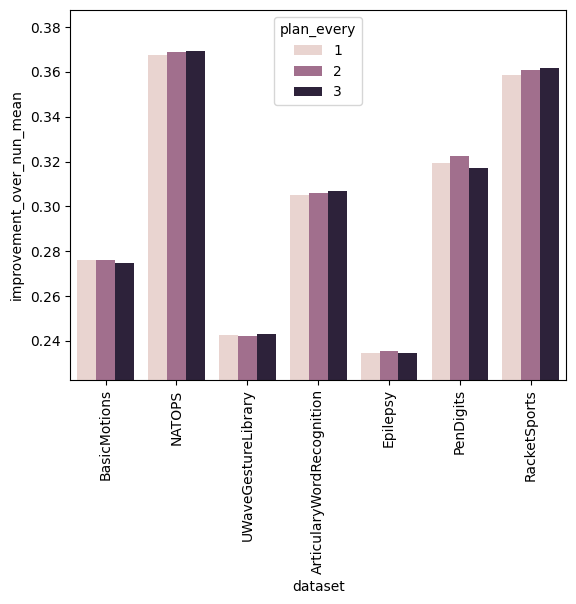

In [202]:
ax = sns.barplot(df_aux_h, x="dataset", y="improvement_over_nun_mean", hue="plan_every")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);

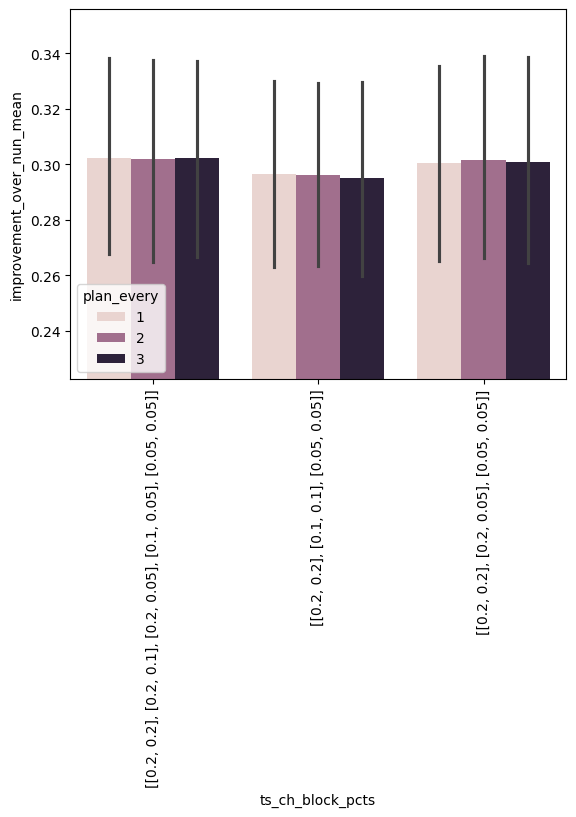

In [204]:
ax = sns.barplot(df_aux, x="ts_ch_block_pcts", y="improvement_over_nun_mean", hue="plan_every")
current_ymax = ax.get_ylim()[1]
ax.set_ylim(df_aux_h["improvement_over_nun_mean"].min() * 0.95, current_ymax)
plt.xticks(rotation=90);